# Introduction

Now we're ready to try some classical classification methods on our data. The features are density for a few different cut off radiuses and normalized kinetic energy of each particle. In the main data we had particles position and velocity and the mass of each particle is known. By choosing different cut off radius and deviding the mass by $r_c^3$ we found density parameter $\delta(r_c)$.
We want to train the data with some models.
It is important to mention our data is quite high bias. Means OUT class particles is four times larger than IN class particles, there for we decided to select sample particles wisely to have equal fraction of each class in amoung of 60000 particles in our sample.
First, we are goining to choose sample particles... 

In [1]:
import numpy as np
import pandas as pd
import timeit
%alias_magic t timeit

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


# Data

Importing our data, including X and Y matrices. X is features as we defined before, density for differenet values of cutt off radius and square velosity which shows kinetic energy by a constant factor and Y show the final class of the partice, 0 for OUT class and 1 for IN.

for each particle: 

X = $(\delta(r_c=0.8),
      \delta(r_c=1.2),
      ...,
      \delta(r_c=4.8),
      v^2 ) $
      
Y = 0 or 1

In [2]:
data = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full_particle_Data\Features60(δ).csv')

X, Y = data.iloc[:,2:], data['In_halo']
print(X)
print(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

       den_rc=0.8  den_rc=1.2  den_rc=1.6  den_rc=2  den_rc=2.4  den_rc=2.8  \
0       -0.000684   -0.020199   -0.011283 -0.012361   -0.011563   -0.012744   
1        0.002344   -0.016610   -0.007876 -0.009066   -0.011563   -0.012108   
2        0.002344   -0.022891   -0.014311 -0.011973   -0.008759   -0.007518   
3       -0.003712   -0.015713   -0.015447 -0.013330   -0.012124   -0.013662   
4        0.014457   -0.013021   -0.010526 -0.009648   -0.009545   -0.009848   
...           ...         ...         ...       ...         ...         ...   
59995   -0.018854   -0.033658   -0.028695 -0.019338   -0.016386   -0.014015   
59996    0.005372   -0.022891   -0.013176 -0.018950   -0.013021   -0.011755   
59997   -0.027938   -0.016610   -0.012797 -0.013330   -0.016274   -0.015428   
59998   -0.024910   -0.029172   -0.028317 -0.018369   -0.019863   -0.017406   
59999   -0.079418   -0.039939   -0.033995 -0.023020   -0.018966   -0.015640   

       den_rc=3.2  den_rc=3.6  den_rc=4  den_rc=4.4

In [3]:
#converting the dataframes to numpy arrays

X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
X = np.array(X)
Y = np.array(Y)

**It is also worth doing to upload a completely random sample which is biased over the OUT class and then give more weight to the In class to avoid a high variance.**

Here I'm uploading this sample for mentioned purpose:

In [4]:
from sklearn import preprocessing

data_f = pd.read_csv(r'C:\Users\Saba\Documents\ML project\Full_particle_Data\Features.csv')
den0 = 80.621568

X_f, Y_f = data_f.iloc[:,2:], data_f['In_halo']
#X_f.replace(X_f.iloc[:,:-1], X_f.iloc[:,:-1] - den0)
X_f.iloc[:,:-1] = X_f.iloc[:,:-1] - den0
#Normalizing the velocities:

# Create v, where v the 'scores' column's values as floats
v = data_f[['v^2']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
v_scaled = min_max_scaler.fit_transform(v)

# Run the normalizer on the dataframe
v = pd.DataFrame(v_scaled)
X_f.iloc[:,-1] = v

#X_f.replace(X_f.iloc[:,-1],v)
print(X_f)
print(Y_f)


from sklearn.model_selection import train_test_split
X_train_f, X_test_f, Y_train_f, Y_test_f  = train_test_split(X_f, Y_f, random_state= 0)

print(len(X_train_f))
print(len(X_test_f))
print(len(Y_f))

       den_rc=0.8  den_rc=1.2  den_rc=1.6  den_rc=2  den_rc=2.4  den_rc=2.8  \
0       -0.055162    0.035261   -0.482408 -0.918443   -0.706203   -0.731353   
1       -0.787584   -1.339161   -1.123277 -0.965318   -1.158316   -1.158421   
2        2.142104    1.192668    1.073989  0.190932   -0.272176   -0.002490   
3       -0.543443   -0.109415    0.890883  0.644057    0.342697    0.065841   
4       -0.543443    0.107599    0.097426  0.003432   -0.190795   -0.452335   
...           ...         ...         ...       ...         ...         ...   
99995    0.677260    1.192668    0.829848  0.972182    1.047992    0.697902   
99996    2.386244    1.482020    2.233657  1.706557    1.346386    0.942754   
99997   -0.787584    0.396951    0.463637  0.644057    0.586838    0.174031   
99998    3.362807    4.303201    3.790053  3.425307    2.585174    2.104380   
99999   -0.543443    0.324613    0.097426  0.065932   -0.407809   -0.469418   

       den_rc=3.2  den_rc=3.6  den_rc=4  den_rc=4.4

C:\Users\Saba\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Saba\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Saba\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [5]:
X_test_f = np.array(X_test_f)
X_train_f = np.array(X_train_f)
Y_test_f = np.array(Y_test_f)
Y_train_f = np.array(Y_train_f)
X_f = np.array(X_f)
Y_f = np.array(Y_f)

# Training Models

We are going to train the data using different models to compare quality and results then we can choose one to continue our project. For the first step logistic regression; Results are coming below.

## 1 -  Logistic Regression (uses regularization as default.)

In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_lg = classifier.predict(X_test)
%t Y_predict_lg = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_lg[Y_predict_lg == 1]))


148 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
292 µs ± 41.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
15000
7130


***Training time of LG = $143 ms$***

***Prediction time of LG = $292 \mu s$***

Below you can see the result of logisitic regression classifier prediction comparing to the real classes that we knew. Our feature space is a 12 dimensional space and we are going to visualize our result in 2 of it's dimensions.

First we showed it in the $\delta(r_c=0.8)$ versus $\delta(r_c=1.2)$ space and then in the velocity versus $\delta(r_c=1.2)$ space.

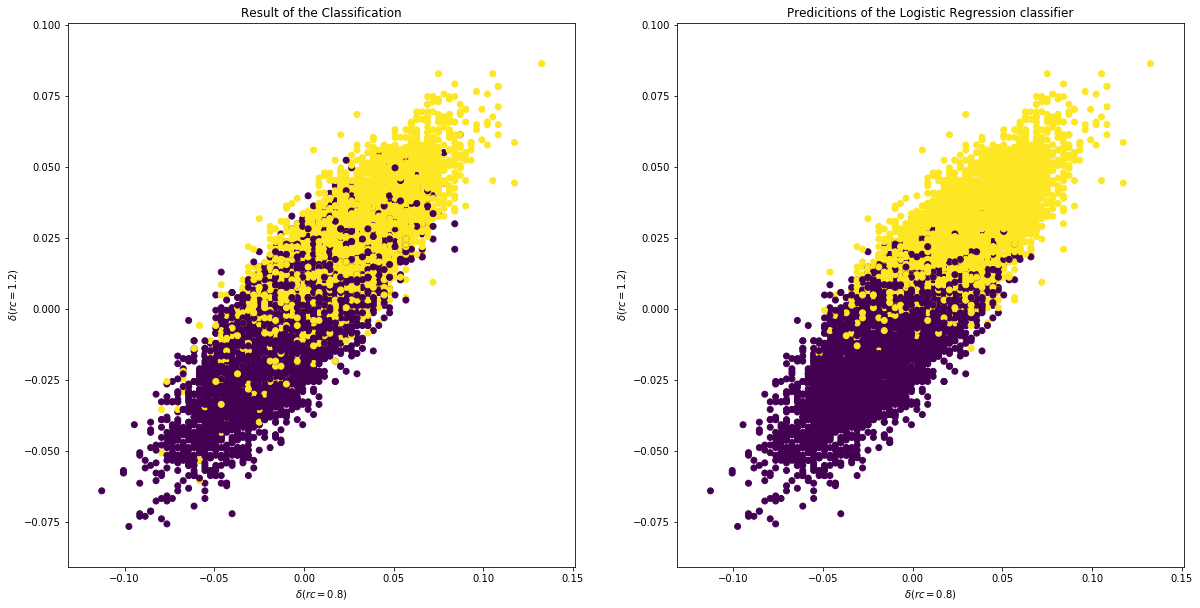

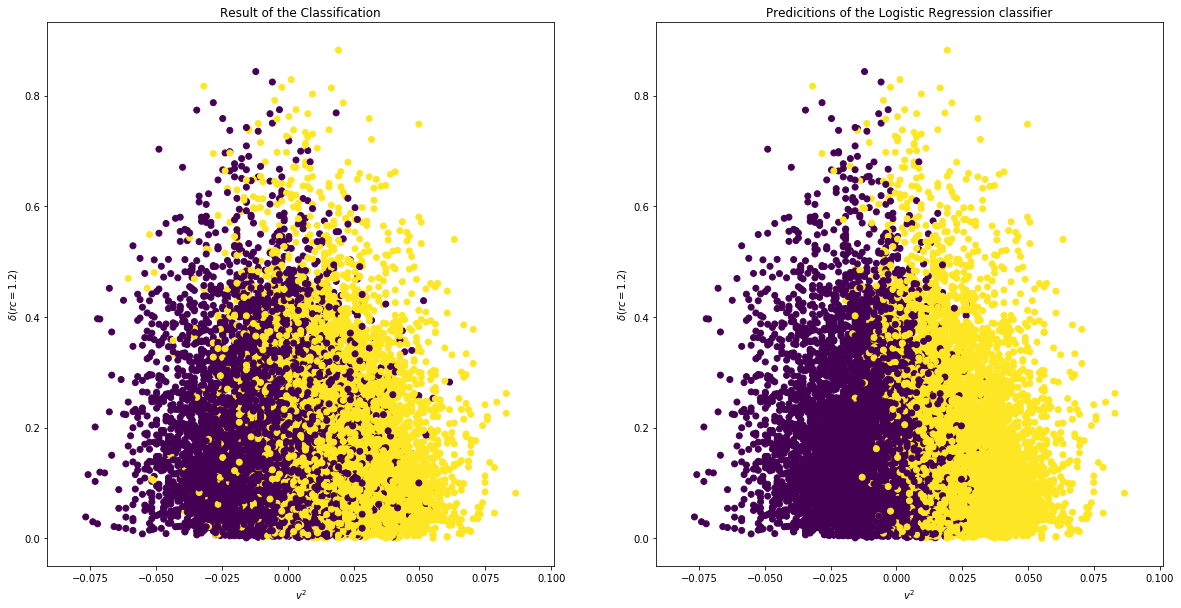

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

#ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X_test[:,:2].T, c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Logistic Regression classifier')
plt.scatter(*X_test[:,:2].T, c = Y_predict_lg)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$v^2$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

#ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(X_test[:,1].T, X_test[:,-1].T , c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$v^2$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Logistic Regression classifier')
plt.scatter(X_test[:,1].T, X_test[:,-1].T , c = Y_predict_lg)
plt.show()

In [9]:
#Over all classification report
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_lg)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      7856
         1.0       0.79      0.79      0.79      7144

    accuracy                           0.80     15000
   macro avg       0.80      0.80      0.80     15000
weighted avg       0.80      0.80      0.80     15000



## Fine Tuning the model:

For the firt step of the procedure we want to tune our model in a way which gives us the highest validation, for this purpose we should find the appropriate complexity for the model and the sample size. to do so we use two usefull concepts:
- Validation curves
- Learning curves

We should fine tune our model to get the best estimation for this purpose we need to find our hyperparameters.
One way to do so is using validation curves. Validation curves is "training scores" versus "specific hyperparameter" and from them we can find the optimal value of desired hyperparameter.

The appropriate hyperparamether of the logistic regression is C value which is the inverse of the regularization.
To finding the best C we plot it versus the score for trainig score and cross_validation score.

### - Validation Curve

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4
 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2
 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.
 9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


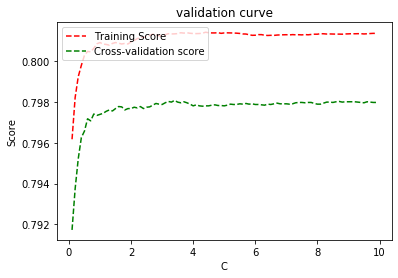

In [10]:
from sklearn.model_selection import validation_curve


param_range = np.arange(.1,10, .1)
print(param_range)

train_scores, test_scores = validation_curve(
classifier, X=X, y=Y,cv=5, param_name="C", param_range=param_range,
scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

As can be seen in the plot, the training and cross-validation score does not converge it means that our model suffers from quite high bias but as the both scores are high the variance of the model is not very high.
this is in agreement with our knowledge of logistic regression model which has a high bias and low variance.
around $C = 2$ we get the maximum score for both training and validation and it means that here is the place were we cane minimize the variance of the model, but the bias is really high here. so the model has overfitting.
in a bit higher variance, and around $C = 0.5$, the difference between training score and validation score and so the bias reduces notably while training score gets lower and in the range of the validation score. it means that choosing such a $C$ will reduce the danger of overfitting in our model.

**optimal value chosen for $C = 0.5$**

### - Learning Curve

The other plot that we use to tune the model is learning curve. We should access the amount of our data to find the best sample size for training as well as estimating the bias and variance of the model.
One way to do so is using learning curves which are training score and validation score for different sample sizes. 

In [10]:
from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,48000,1000)

#computing training score and validation score for each sample size cv times
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

print('Training scores:\n\n', pd.DataFrame( train_scores) )

print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

Training scores:

            0         1         2         3         4
0   0.670000  0.753000  0.753000  0.753000  0.753000
1   0.724500  0.835500  0.835500  0.835500  0.835500
2   0.743333  0.842333  0.842333  0.842333  0.842333
3   0.756000  0.827750  0.827750  0.827750  0.827750
4   0.775000  0.818000  0.818000  0.818000  0.818000
5   0.782167  0.809833  0.809833  0.809833  0.809833
6   0.784000  0.804714  0.804714  0.804714  0.804714
7   0.777500  0.805750  0.805750  0.805750  0.805750
8   0.784111  0.807556  0.807556  0.807556  0.807556
9   0.780400  0.806800  0.806800  0.806800  0.806800
10  0.782545  0.804182  0.804182  0.804182  0.804182
11  0.780833  0.803417  0.801500  0.801500  0.801500
12  0.783077  0.806000  0.794385  0.794385  0.794385
13  0.779786  0.802857  0.792214  0.792214  0.792214
14  0.781667  0.801600  0.790667  0.790667  0.790667
15  0.781188  0.799125  0.790687  0.790687  0.790687
16  0.780882  0.798471  0.793471  0.793471  0.793471
17  0.778833  0.796389  0.7

[0.7364     0.8133     0.82253333 0.8134     0.8094     0.8043
 0.80057143 0.8001     0.80286667 0.80152    0.79985455 0.79775
 0.79444615 0.79185714 0.79105333 0.790475   0.79195294 0.79274444
 0.79132632 0.78901    0.78993333 0.7878     0.78996522 0.79064167
 0.790936   0.79081538 0.79163704 0.79185714 0.79282069 0.79201333
 0.79363226 0.79261875 0.79328485 0.79441765 0.79488    0.79489444
 0.79504324 0.79468947 0.79589231 0.79763    0.79871707 0.79932857
 0.79926047 0.80034091 0.7992     0.79925217 0.80051915]
[0.68241939 0.76011862 0.77271738 0.78448382 0.79050065 0.78988405
 0.79088395 0.79263397 0.79126727 0.79211727 0.79221723 0.79288391
 0.79301729 0.79423392 0.7941673  0.79480056 0.79511723 0.79618391
 0.79578392 0.7957506  0.79676726 0.79668394 0.79673391 0.79728392
 0.79716727 0.79605062 0.79533398 0.79543396 0.79575063 0.79573396
 0.79643391 0.79675059 0.79680059 0.79675058 0.79606722 0.79550054
 0.79658388 0.79711722 0.79760055 0.79773389 0.79785054 0.79798388
 0.79795054 

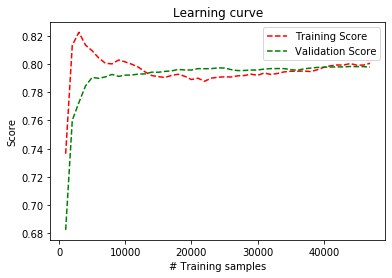

In [11]:
train_scores_mean = train_scores.mean(axis = 1)
print(train_scores_mean)
validation_scores_mean = validation_scores.mean(axis = 1)
print(validation_scores_mean)

plt.title('Learning curve')
plt.plot(ns_list, train_scores_mean,'r--',label = 'Training Score')
plt.plot(ns_list, validation_scores_mean, 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

Around sample size equal to 20000 both training score and validation score approximately get fixed, varying slightly and converge, which means a sample of size 35000 will work quite well.

If the difference between two curves be significant bias is high and if the score for both be small variance is large, so it is good to have two curves which converges in high values. 

Also we see that the validation score curve and trainnig score curve are really close to each other for most of the sample sizes it means that our model doesn't experinece high bias, also the score has an approximatlely high value which means that the variance of the model is also acceptable and so there is no over or under-fitting.

**# training sample = 35000**

### Now we should tune our model with these new values.

In [11]:
#The new training set
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, train_size = 35000 , random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

35000
25000
60000


In [12]:
#Runnig the tuned model, the penalty is L2
classifier = LogisticRegression(C = 0.7)
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_lg = classifier.predict(X_test)
%t Y_predict_lg = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_lg[Y_predict_lg == 1]))

98.6 ms ± 6.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
480 µs ± 76.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
25000
11905


***Training time of LG = $99 ms$***

***Prediction time of LG = $480 \mu s$***

It's interesting that our training time reduced and our prediction time increased relative to the past, because our training sample got smaller and our test sample got bigger! 

In [13]:
#Evaluating the new trained model:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_lg)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81     13128
         1.0       0.79      0.79      0.79     11872

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



Now that we have our tuned model it's neccessary to see what different metrics says about our model and it's validation:

## Metrics:
For getting more sense about the classification we can look at the confusion matrix:

### - Confusion matrix

| **True Positive(TP)** || **False Positive(FP)**   |
|------||------|
|   **False Negative(FN)**   || **True Negative(TN)**|


In [14]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict_lg)
print('Here is the confusion matrix for the LG classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')


Here is the confusion matrix for the LG classifier: 

TP = 10612   FP = 2516 

FN = 2483   TN = 9389 



Confusion matrix, without normalization
[[10612  2516]
 [ 2483  9389]]
Normalized confusion matrix
[[0.80834857 0.19165143]
 [0.20914757 0.79085243]]


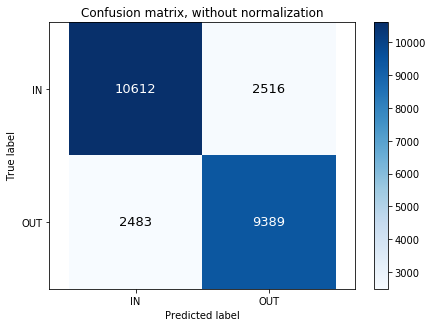

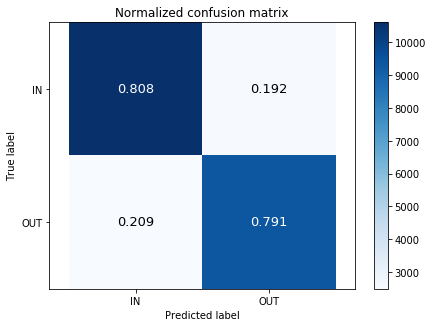

In [15]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### - Acurracy  
We can read the Acurracy from confusion matrix as well, with following formulation:

$Acurracy = \frac{TP + TN}{TP+TN+FP+FN} * 100$ 

Which means the accuracy is the number of correct prediction on the total training size.

In [16]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 80.004%


It would also be meaningfull to looking at the precision and recall of the model but as we choosed our data in a way that the size of our two classes are approximately equal there shouldn't be big difference between acurracy and precison:

### - Precision
The fraction of prediction that we got right = $\frac{TP}{TP+FP}$

### - Recall 
The fraction of the instances that were predicted correctly = $\frac{TP}{TP+FN}$

As you can see the score of all of the estimators, precision, recall and accuracy are quite high, which shows that linear classifiers are appropriate choices for us.

Also there should be a trade of between precision and recall which would not let us to higher them as much as we want.

In [17]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y_test, Y_predict_lg, pos_label=0)
precision = precision_score(Y_test, Y_predict_lg, pos_label = 0)
print(f"The recall for the LG classifier: \n {round(recall,3)}"  )
print(f"The precision for LG classifier: \n {round(precision,3)}"  )

The recall for the LG classifier: 
 0.808
The precision for LG classifier: 
 0.81


### - F1 score

For looking at the precision and recall at the same time we can use the F$\beta$ score of the model which is defined as:

$F\beta_{score} = \frac{(1+\beta^2).precision.recall}{\beta^2 precision+recall}$

we use F1 score for our purpose:

In [18]:
F1 = 2*precision*recall / (precision+recall)
print('The F1 score is : {}'.format(round(F1,3)))

The F1 score is : 0.809


### - Precision - Recall curve

The next task is to se wether we are using the best model parameters or not, logisitc regression model gets point above a threshold value in the sigmoid function as 1 and the points below it as 0.
sklearn's logistic regression function uses the threshold equals to 0.5 as default but we can change the threshold to see wether we are getting the best performance of the model or not.
as there is a trade of between the value of the precision and recall we plotted both of them.

[[0.733093   0.266907  ]
 [0.57329674 0.42670326]
 [0.84961299 0.15038701]
 ...
 [0.85861936 0.14138064]
 [0.66237289 0.33762711]
 [0.54173211 0.45826789]]
[0. 0. 0. ... 0. 0. 0.]


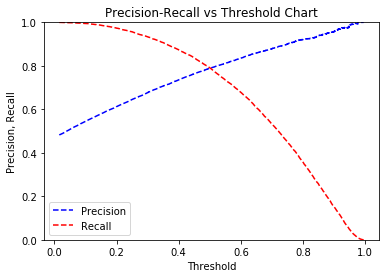

In [19]:
#getting the probability of being in each class from classifier without applying the threshold
Y_probs=classifier.predict_proba(X_test) 
print(Y_probs)
print(Y_predict_lg)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

As can be seen increasing precision will result in decrease of the recall and vice versa.
the trade of point between precision and recall is where the two curves coincides which is around the threshold = 0.5 and will result in precision and recalls equal to 0.8.
so the used 0.5 threshold resulted in the best possible performance of the Logisitc Regression model and there is no need to change it.

### - ROC curve (Receiver operating characteristic)

When it is important for us to bounding the error and lower the FP rate as much as possible we can look at the FP rate and the TP rate of the model in place of the precision and recall for different thresholds, the best performance possible can be achieved when the TP rate get closer to one and FP rate get closer to zero, which is not complletely possible as there is a trade of between the FPR and TPR.
if we choose high thresholds we will get all of the test samples in the positive class which will cause to get both FPR  and TPR equal to one. this isn't what we want! so looking at the ROC curves can be helpfull:

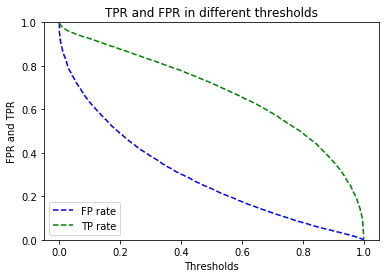

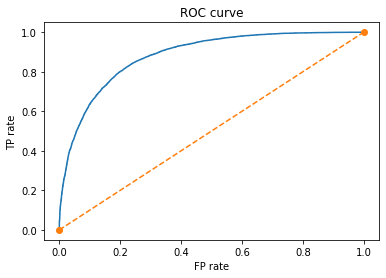

In [20]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_probs[:,1], pos_label=1)

plt.plot(fpr, thresholds , 'b--', label = 'FP rate')
plt.plot(tpr, thresholds , 'g--', label = 'TP rate')
plt.ylabel('FPR and TPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR in different thresholds')
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()


plt.title('ROC curve')
plt.plot(fpr , tpr)
plt.plot([0, 1], [0, 1] , 'o--')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.show()

The threshold that we choose will result to FPR  arond 0.2 and TPR around 0.8 which again seems to be in the best point possible. lower FPRs will result in lower TPRs as well which we do not like!

### - AUC (Area under ROC curve)
Also AUC which is the area under the ROC curve can be another measure which will help and it gives an overal measure of the performance of our model over all thresholds. The ideal AUC should be very close to one, but as wee can see the behaviour of our TPR and FPR is in a way that we cannot get this ideal value and the model has divergence from idealized one.
but we cannot tune our model with the help of AUC.

the value of AUC score for our model is:

In [21]:
from sklearn.metrics import roc_auc_score
print('The AUC score of our LG  is : {}' .format(round(roc_auc_score(Y_test, Y_probs[:,1]),3)))

The AUC score of our LG  is : 0.882


## Over all report:

| *Model* || *Training time* || *prediction time* || *f1 score* || *ROC AUC* || *Accuracy* |
|------||------||------||------||------||------|
| *Logistic Regression*  || 102 $ms$ || 396 $\mu s$ || 0.809 || 0.882 || 80.004% |

We choosed Acurracy, F1 and AUC scores as our appropriate metrics because:

1- Accuracy is a measure of how correct our mode predicts.

2- AUC is a measure of how close each model over all it's threshold can get to the ideal case, and so it's a good quantity to do comparison with.

3- F1 score is a metric which collects the values of precision and recall togather.

It's time to do the same for the next model.
## 2- K Nearest Neighbour

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3 , weights='uniform', 
                                  algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None)

%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_knn = classifier.predict(X_test)
%t Y_predict_knn = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_knn[Y_predict_knn == 1]))


46.6 ms ± 8.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
703 ms ± 6.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15000
7146


***Training time of LG = $46.6 ms$***

***Prediction time of LG = $703ms$***

Visualising the prediction result in a 2-D subspace of our feature space:
First we showed it in the $\delta(r_c=0.8)$ versus $\delta(r_c=1.2)$ space and then we visualized it in the velocity versus $\delta(r_c=1.2)$ space.

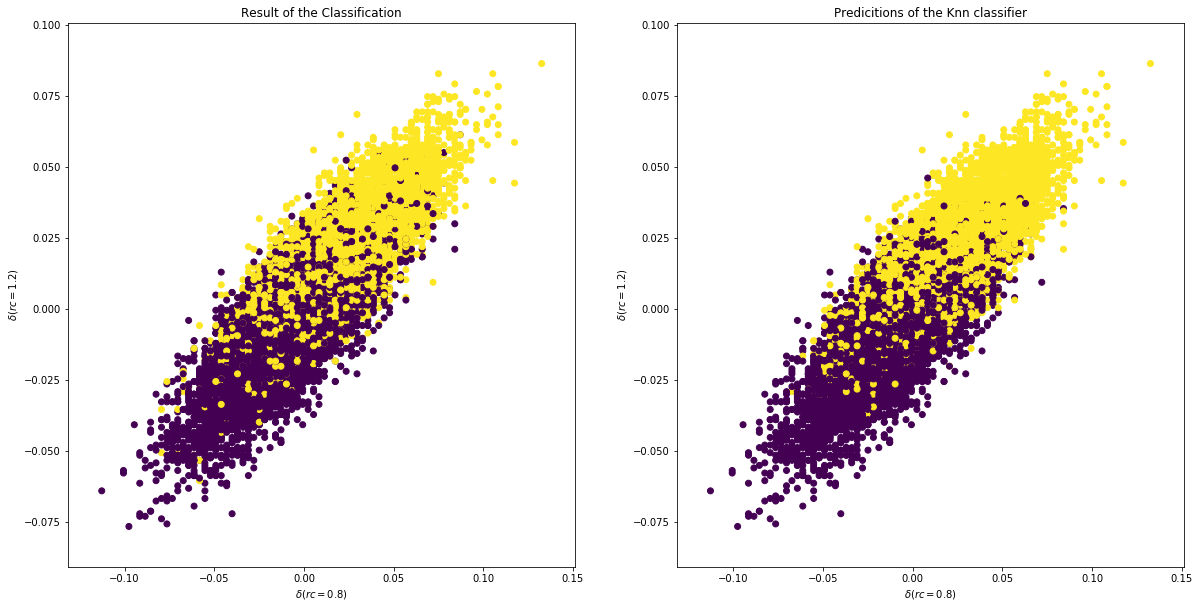

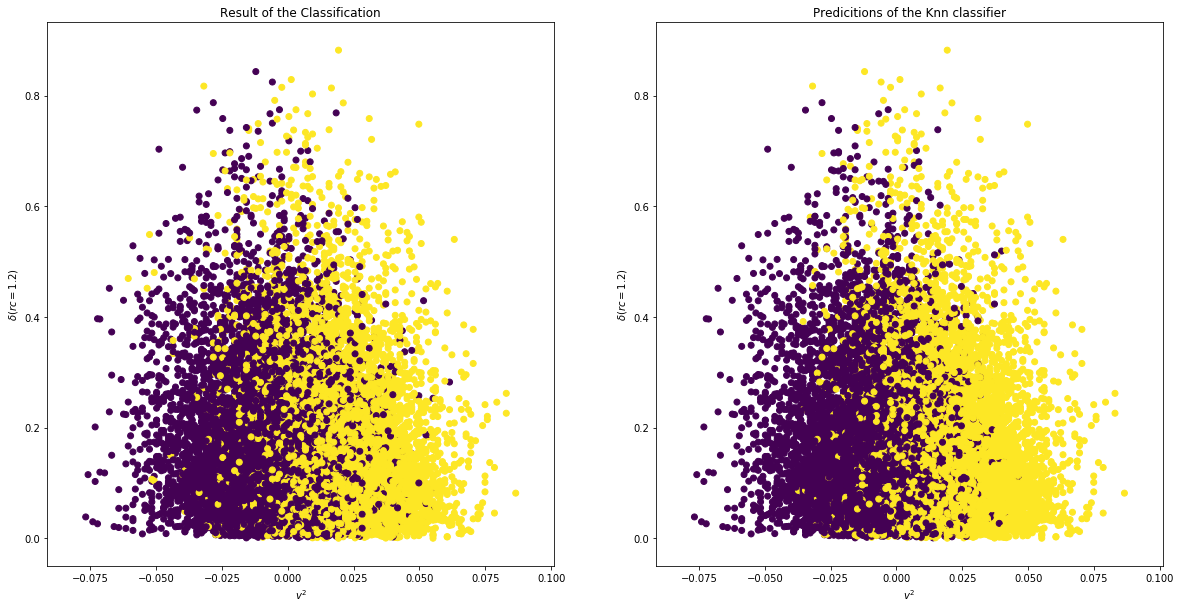

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

#ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X_test[:,:2].T, c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Knn classifier')
plt.scatter(*X_test[:,:2].T, c = Y_predict_knn)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$v^2$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

#ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(X_test[:,1].T, X_test[:,-1].T , c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$v^2$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Knn classifier')
plt.scatter(X_test[:,1].T, X_test[:,-1].T , c = Y_predict_knn)
plt.show()

In [9]:
#Over all classification report
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      7856
         1.0       0.75      0.75      0.75      7144

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000



## Fine Tuning the model:


The appropriate hyperparamethers of the Knn algorithm are the number of neighbors associated and the leaf size, when the machine is using BallTree or KDtree algorithms, it can affect the speed of our training and not it's complexity, but we should fix it during the training.
with the description above, there is no correlation between the performance of n_neighbor and leaf_size, so we can find each of their optimal values seprately.
to finding the best n_neighbor we plot the n_neighbor versus the score, for trainig score and cross_validation score.

### - Validation Curve

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


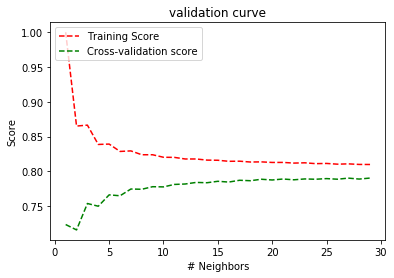

In [10]:
from sklearn.model_selection import validation_curve


param_range = np.arange(1,30, 1)
print(param_range)

train_scores, test_scores = validation_curve(
classifier, X=X, y=Y,cv=5, param_name="n_neighbors", param_range=param_range,
scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('# Neighbors')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

We can see that our used n_neighbors result in high training score and low cross-validation score which is subject to overfitting, the optimal value of n_neighbor is when the cross validation score arrives at it's maximum value.
As shown in the plot after n_neighbor = 20, cross validation score gets maximum and remain constant, also training score gets closer to validation score which cause to reducing of overfitting.

The remained difference between training and validation scores shows that our algorithm suffers from an irreducable bias.

**Optimal value of n_neighbour = 20**

Now we should find the leaf size which make our prediction time and the training time optimum for the optimal n_neighbors.

### - Run time versus leaf size

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


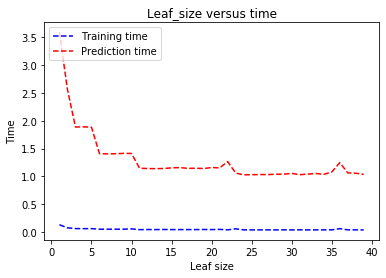

In [30]:
import time

leaf_range = np.arange(1,40,1)

t_time = np.array([])
p_time = np.array([])

for i in leaf_range:
    print(i)
    classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=i, p=2, metric='minkowski')
    
    start = time.time()
    classifier.fit(X_train, Y_train)
    stop = time.time()
    t1 = stop - start
    t_time = np.append(t_time , t1)
    
    start = time.time()
    n = classifier.predict(X_test)
    stop = time.time()
    t2 = stop - start
    p_time = np.append(p_time , t2)
    
plt.plot(leaf_range , t_time , 'b--' , label = 'Training time')
plt.plot(leaf_range , p_time , 'r--' , label = 'Prediction time')
plt.title('Leaf_size versus time')
plt.xlabel('Leaf size')
plt.ylabel('Time')
plt.legend(loc='upper left')
plt.show()

The plot shows that the training time does not change noticably with the leaf size, but prediction time decrease as the leaf size increases, so a leaf size around 30 will do its job well enough.

**Optimal leaf_size = 30**

### - Learning Curve

We should access the amount of our data to find the best sample size for training as well as estimating the bias and variance of the model.
One way to do so is using learning curves which are training score and validation score for different sample sizes. 

In [34]:
from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,48000,1000)

print('learning started')
#computing training score and validation score for each sample size cv times
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

print('Training scores:\n\n', pd.DataFrame( train_scores) )

print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

learning started
Training scores:

            0         1         2         3         4
0   0.761000  0.843000  0.843000  0.843000  0.843000
1   0.760000  0.874000  0.874000  0.874000  0.874000
2   0.775000  0.861667  0.861667  0.861667  0.861667
3   0.785250  0.854250  0.854250  0.854250  0.854250
4   0.797000  0.843400  0.843400  0.843400  0.843400
5   0.807833  0.832333  0.832333  0.832333  0.832333
6   0.803429  0.826000  0.826000  0.826000  0.826000
7   0.798125  0.825750  0.825750  0.825750  0.825750
8   0.805333  0.825444  0.825444  0.825444  0.825444
9   0.801100  0.822900  0.822900  0.822900  0.822900
10  0.802364  0.818909  0.818909  0.818909  0.818909
11  0.799917  0.818250  0.816667  0.816667  0.816667
12  0.799308  0.821538  0.807000  0.807000  0.807000
13  0.799214  0.819000  0.807000  0.807000  0.807000
14  0.800333  0.815933  0.806800  0.806800  0.806800
15  0.798687  0.814562  0.807688  0.807688  0.807688
16  0.799000  0.816588  0.808882  0.808882  0.808882
17  0.7980

[0.8266     0.8512     0.84433333 0.84045    0.83412    0.82743333
 0.82148571 0.820225   0.82142222 0.81854    0.8156     0.81363333
 0.80836923 0.80784286 0.80733333 0.8072625  0.80844706 0.80903333
 0.80622105 0.80446    0.80593333 0.80387273 0.8052     0.80555833
 0.805648   0.80552308 0.8064     0.80675    0.80774483 0.80682667
 0.80761935 0.80648125 0.80677576 0.80785882 0.80862286 0.80838333
 0.80831892 0.8076     0.80873333 0.81038    0.81147317 0.81160476
 0.81170233 0.81237273 0.81132444 0.81133043 0.81252766]
[0.75735127 0.76826761 0.77368385 0.78178395 0.78398398 0.78358395
 0.78470058 0.78528387 0.78460045 0.78580052 0.78571716 0.78723387
 0.78715055 0.78651713 0.78668383 0.78698381 0.78671716 0.78730048
 0.7883505  0.78710048 0.7874338  0.78680048 0.78796711 0.78820046
 0.78788381 0.78628383 0.78643384 0.78648382 0.78728383 0.78690049
 0.7869505  0.7873172  0.78705055 0.7869005  0.78571714 0.78615048
 0.78650052 0.78643386 0.78646723 0.78660056 0.78725055 0.78713389
 0.78

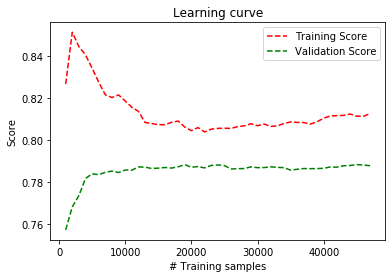

In [36]:
train_scores_mean = train_scores.mean(axis = 1)
print(train_scores_mean)
validation_scores_mean = validation_scores.mean(axis = 1)
print(validation_scores_mean)

plt.title('Learning curve')
plt.plot(ns_list, train_scores_mean,'r--',label = 'Training Score')
plt.plot(ns_list, validation_scores_mean, 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

Around sample size equal to 20000 both training score and validation score approximately get fixed, varying slightly and converge, which means a sample with this size will work quite well.
But we see that the validation curve and trainnig curve's fix point has distanc from each other for most of the sample sizes it means that our model suffers from high bias and low variance (because the gap between training curve and validation curve is not narrow) and so it's subject to over-fitting.

**# training sample = 25000**

### Tunning our model with new values

In [11]:
#The new training set
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, train_size = 25000 , random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

25000
35000
60000


In [12]:
#Runnig the tuned model, the penalty is L2
classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=30 , p=2, metric='minkowski')
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_knn = classifier.predict(X_test)
%t Y_predict_knn = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_knn[Y_predict_knn == 1]))

20.4 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.97 s ± 6.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
35000
16356


***Training time of LG = $20.4 ms$***

***Prediction time of LG = $1.97 s$***

As the traning set size reduced and test size increased we can see an decrease in the training time and increase in prediction time.

In [13]:
#Evaluating the new trained model:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80     18443
         1.0       0.78      0.77      0.78     16557

    accuracy                           0.79     35000
   macro avg       0.79      0.79      0.79     35000
weighted avg       0.79      0.79      0.79     35000



The new result shows that our tunning worked as we have an increase in our F1 score from the past.

Now we can check the validation of our tunned model with different metrics:

## Metrics:

- ### Confusion matrix



In [14]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict_knn)
print('Here is the confusion matrix for the Knn classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')


Here is the confusion matrix for the Knn classifier: 

TP = 14909   FP = 3534 

FN = 3735   TN = 12822 



Confusion matrix, without normalization
[[14909  3534]
 [ 3735 12822]]
Normalized confusion matrix
[[0.80838258 0.19161742]
 [0.22558434 0.77441566]]


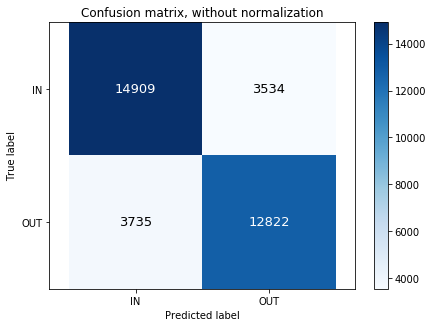

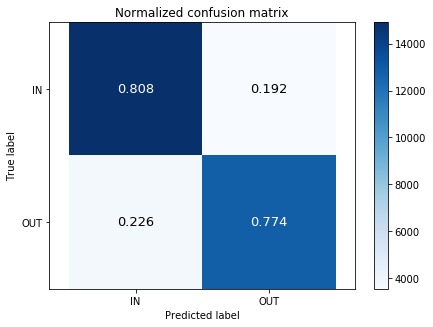

In [15]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


### - Acurracy  
$Acurracy = \frac{TP + TN}{TP+TN+FP+FN} * 100$ 


In [16]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 79.231%


### - Precision
The fraction of prediction that we got right = $\frac{TP}{TP+FP}$

### - Recall 
The fraction of the instances that were predicted correctly = $\frac{TP}{TP+FN}$


In [17]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y_test, Y_predict_knn, pos_label=0)
precision = precision_score(Y_test, Y_predict_knn, pos_label = 0)
print(f"The recall for the Knn classifier: \n {round(recall,3)}"  )
print(f"The precision for Knn classifier: \n {round(precision,3)}"  )

The recall for the Knn classifier: 
 0.808
The precision for Knn classifier: 
 0.8


### - F1 score

For looking at the precision and recall at the same time we can use the F$\beta$ score of the model which is defined as:

$F\beta_{score} = \frac{(1+\beta^2).precision.recall}{\beta^2 precision+recall}$

we use F1 score for our purpose:

In [18]:
F1 = 2*precision*recall / (precision+recall)
print('The F1 score is : {}'.format(round(F1,3)))

The F1 score is : 0.804


### - Precision - Recall curve

For checking if the threshold of our model is doing well enough.

[[0.75 0.25]
 [0.65 0.35]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.7  0.3 ]
 [0.95 0.05]]
[0. 0. 0. ... 0. 0. 0.]


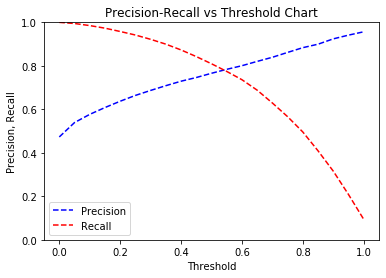

In [19]:
#getting the probability of being in each class from classifier without applying the threshold
Y_probs=classifier.predict_proba(X_test) 
print(Y_probs)
print(Y_predict_knn)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

With the logic that we followed in the logistic regression, we can see that the best working threshold is between 0.5 and 0.6.

### - ROC curve (Receiver operating characteristic)

When it is important for us to bounding the error and lower the FP rate as much as possible we can look at the FP rate and the TP rate of the model in place of the precision and recall for different thresholds, the best performance possible can be achieved when the TP rate get closer to one and FP rate get closer to zero, which is not complletely possible as there is a trade of between the FPR and TPR.
if we choose high thresholds we will get all of the test samples in the positive class which will cause to get both FPR  and TPR equal to one. this isn't what we want! so looking at the ROC curves can be helpfull:

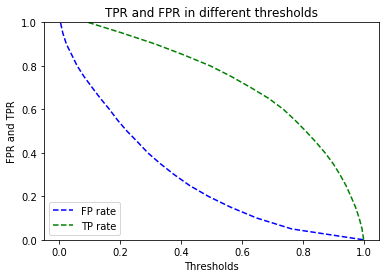

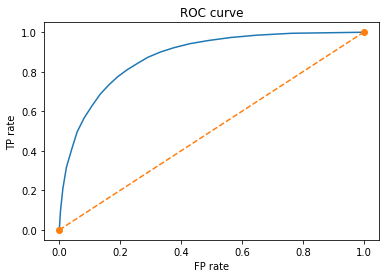

In [20]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_probs[:,1], pos_label=1)

plt.plot(fpr, thresholds , 'b--', label = 'FP rate')
plt.plot(tpr, thresholds , 'g--', label = 'TP rate')
plt.ylabel('FPR and TPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR in different thresholds')
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()


plt.title('ROC curve')
plt.plot(fpr , tpr)
plt.plot([0, 1], [0, 1] , 'o--')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.show()

### - AUC (Area under ROC curve)
Also AUC which is the area under the ROC curve can be another measure which will help and it gives an overal measure of the performance of our model over all thresholds. The ideal AUC should be very close to one, but as wee can see the behaviour of our TPR and FPR is in a way that we cannot get this ideal value and the model has divergence from idealized one.
but we cannot tune our model with the help of AUC.

the value of AUC score for our model is:

In [21]:
from sklearn.metrics import roc_auc_score
print('The AUC score of our LG  is : {}' .format(round(roc_auc_score(Y_test, Y_probs[:,1]),3)))

The AUC score of our LG  is : 0.876


## Over all report:

| *Model* || *Training time* || *prediction time* || *f1 score* || *ROC AUC* || *Accuracy* |
|------||------||------||------||------||------|
| *Knn*  || 17.7 $ms$ || 2.12 $s$ || 0.804 || 0.876 || 79.231% |

# 3 - Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
%alias_magic t timeit

df = pd.read_csv(r'/Users/erfan/Desktop/Features60(δ).csv')

print(df)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.
               id  In_halo  den_rc=0.8  den_rc=1.2  den_rc=1.6  den_rc=2  \
0        194017.0      0.0   -0.000684   -0.020199   -0.011283 -0.012361   
1        194067.0      0.0    0.002344   -0.016610   -0.007876 -0.009066   
2        194211.0      0.0    0.002344   -0.022891   -0.014311 -0.011973   
3        194262.0      0.0   -0.003712   -0.015713   -0.015447 -0.013330   
4        194310.0      0.0    0.014457   -0.013021   -0.010526 -0.009648   
5        194460.0      0.0   -0.015825   -0.014816   -0.005605  0.005082   
6        194472.0      0.0   -0.021882   -0.012124   -0.000684  0.006051   
7        194511.0      1.0   -0.009769   -0.004946    0.008779  0.010121   
8        194516.0      1.0   -0.000684    0.002232    0.014457  0.011090   
9        194599.0      1.0   -0.006741    0.006718    0.012564  0.006051   
10       194606.0      1.0    0.023542    0.035430    0.012186  0.011865   
11    

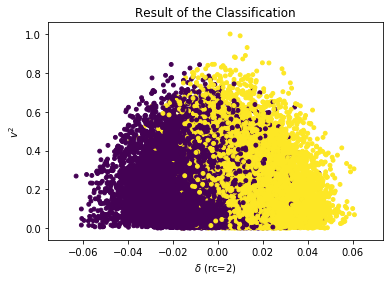

In [2]:
plt.scatter(df['den_rc=2'],df['v^2'],c=df['In_halo'],s=15)
plt.xlabel('$ \delta (r_c=2)$')
plt.ylabel('$v^2$')
plt.title('Result of the Classification')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split 

features = ['den_rc=2', 'v^2']
x = df.iloc[:,2:]
y = df['In_halo']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

#print(y_train)

In [16]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

clf = DecisionTreeClassifier(max_depth=20)

%t clf.fit(x_train,y_train)

y_pred_dt = clf.predict(x_test)
%t y_pred_dt = clf.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_dt))

416 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.98 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.73225


***Training time of DT = $416 ms$***

***Prediction time of DT = $4.98 ms $***

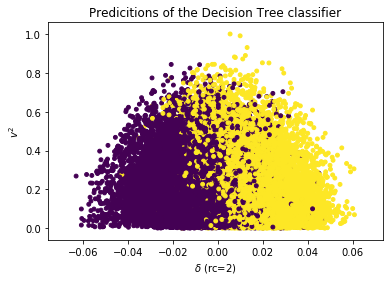

In [17]:
clf = DecisionTreeClassifier(max_depth=20)
clf = clf.fit(x_train,y_train)
plt.scatter(x['den_rc=2'],x['v^2'],c=clf.predict(x),s=15)
plt.xlabel('$ \delta $ (rc=2)')
plt.ylabel('$v^2$')
plt.title('Predicitions of the Decision Tree classifier')
plt.show()

###  Validation curve

Max Depth. Controls the maximum depth of the tree that will be created. It can also be described as the length of the longest path from the tree root to a leaf. The root node is considered to have a depth of 0

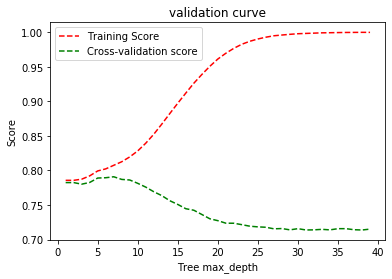

In [25]:
from sklearn.model_selection import validation_curve


param_range = np.arange(1, 40, 1)

train_scores, test_scores = validation_curve(
    clf, X=x, y=y,cv=5, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('Tree max_depth')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()


As training score is a score related to the training set and cross-validation score is relatedd to the test set, if we get high trainig score and low test score it means that our model has pure prediciton and so it's subject to overfitting.So we want our complexity in a way that we get the maximum of cross validation score 
this will be around tree_max_depth = 6.

###  Learning curve

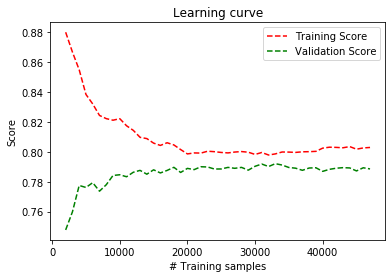

In [26]:
from sklearn.model_selection import learning_curve

clf = DecisionTreeClassifier(max_depth=6)
clf.fit(x_train,y_train)

train_sizes = np.arange(1000,48000,1000)

#computing training score and validation score for each sample size cv times
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= clf , X = x,
                                                   y = y, train_sizes = train_sizes, cv = 5, random_state = 0)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.title('Learning curve')
plt.plot(ns_list[1:], train_scores_mean[1:],'r--',label = 'Training Score')
plt.plot(ns_list[1:], validation_scores_mean[1:], 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

we can see around training sample=20000 training score and validation score start to converge in a high score=0.8 so this sample size is enough for us. You can see that training score and validation score are quite close to each other and also the convergence score is not low so we have low bias and low variance at the same time with training sample size around 20000. 


### Tuning model with new values

In [34]:
from sklearn.model_selection import train_test_split 


x = df.iloc[:,2:]
y = df['In_halo']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20000, random_state=1)

clf = DecisionTreeClassifier(max_depth=6)

%t clf.fit(x_train,y_train)

y_pred_dt = clf.predict(x_test)
%t y_pred_dt = clf.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_dt))

176 ms ± 6.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.08 ms ± 49.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8005


***Training time of DT = $176 ms$***

***Prediction time of DT = $2.08 ms $***

###  Confusion matrix

In [35]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, clf.predict(x_test))
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81     10357
         1.0       0.79      0.79      0.79      9643

    accuracy                           0.80     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000



In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, clf.predict(x)))

[[25458  5981]
 [ 5833 22728]]


Confusion matrix, without normalization
[[25458  5981]
 [ 5833 22728]]
Normalized confusion matrix
[[0.80975858 0.19024142]
 [0.20422954 0.79577046]]


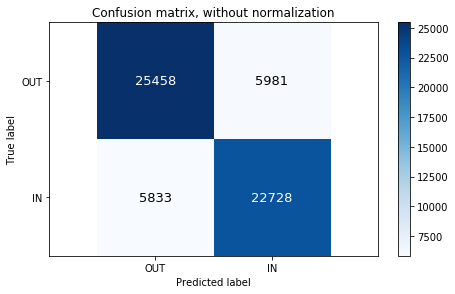

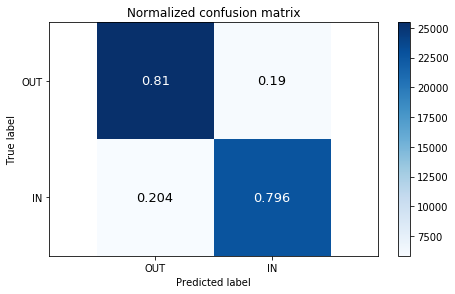

In [37]:
import itertools

conf=confusion_matrix(y, clf.predict(x))
class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [38]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y, clf.predict(x), pos_label=0))
print(precision_score(y, clf.predict(x), pos_label = 0))

0.8097585801075098
0.8135885717938065


recall score = 0.80
precision score = 0.81

###  Precision-Recall curve

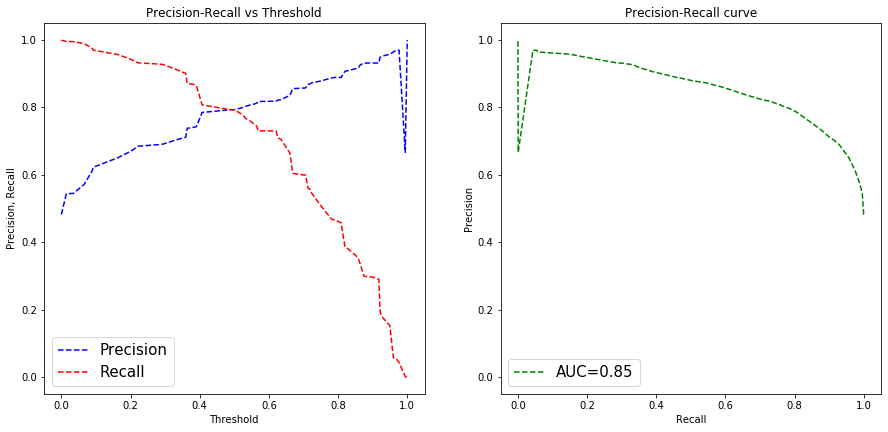

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_probs=clf.predict_proba(x_test) 
precision, recall, thresholds = precision_recall_curve(y_test , y_probs[:, 1]) 
thresholds=np.append(0,thresholds)

area = auc(recall, precision)
#print(area)

plt.figure(figsize=(15, 15))
ax1 = plt.subplot(221,xlabel='Threshold',ylabel='Precision, Recall' ,title='Precision-Recall vs Threshold')
ax1.plot(thresholds, precision, "b--", label="Precision")
ax1.plot(thresholds, recall, "r--", label="Recall")
plt.legend(loc="lower left",prop={'size': 15})

ax2 = plt.subplot(222,title='Precision-Recall curve',xlabel='Recall',ylabel='Precision')
ax2.plot( recall,precision,'g--',label='AUC={:.2f}'.format(area))
ax2.set( ylim=(-.05, 1.05))
plt.legend(loc="lower left",prop={'size': 15})

plt.show()



As can be seen increasing precision will result in decrease of the recall and vice versa.
the trade of point between precision and recall is where to two curves coincide which is around the threshold = 0.5 and will result in precision and recalls equal to 0.8.
so the used 0.5 threshold resulted in the best possible performance of the Logisitc Regression model.

In [40]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_dt)
print(average_precision)

0.7287641317534693


###  ROC curve

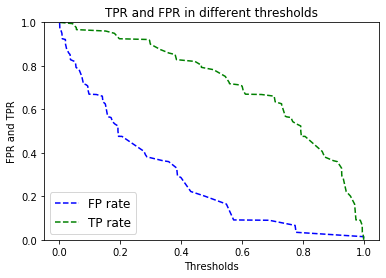

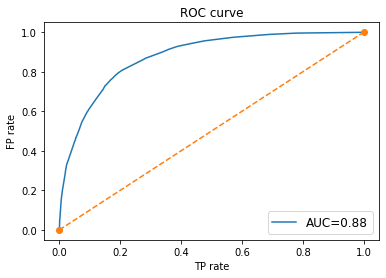

In [41]:
from sklearn import metrics

y_probs=clf.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs[:,1], pos_label=1)

plt.plot(fpr, thresholds , 'b--', label = 'FP rate')
plt.plot(tpr, thresholds , 'g--', label = 'TP rate')
plt.ylabel('FPR and TPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR in different thresholds')
plt.legend(loc="lower left",prop={'size': 12})
plt.ylim([0,1])
plt.show()

area = auc(fpr , tpr)
plt.title('ROC curve')
plt.plot(fpr , tpr,label='AUC={:.2f}'.format(area))
plt.plot([0, 1], [0, 1] , 'o--')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.legend(loc="lower right",prop={'size': 12})
plt.show()

## Overal report

| **Model** || **Training time** || **prediction time** || **f1 score** || **ROC AUC** || **Accuracy** |
|------||------||------||------||------||------|
|   *Decision Tree*   || *180 ms* || *2 ms* || *0.8* || *0.88* || *0.8* |


# 4 - Random Forests

In [4]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_rf = classifier.predict(X_test)
%t Y_predict_rf = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_rf[Y_predict_rf == 1]))


161 ms ± 1.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.5 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15000
7371


***Training time of LG = $161 ms$***

***Prediction time of LG = $8.5 ms$***

Visualising the prediction result in a 2-D subspace of our feature space:
First we showed it in the $\delta(r_c=0.8)$ versus $\delta(r_c=1.2)$ space and then we visualized it in the velocity versus $\delta(r_c=1.2)$ space.

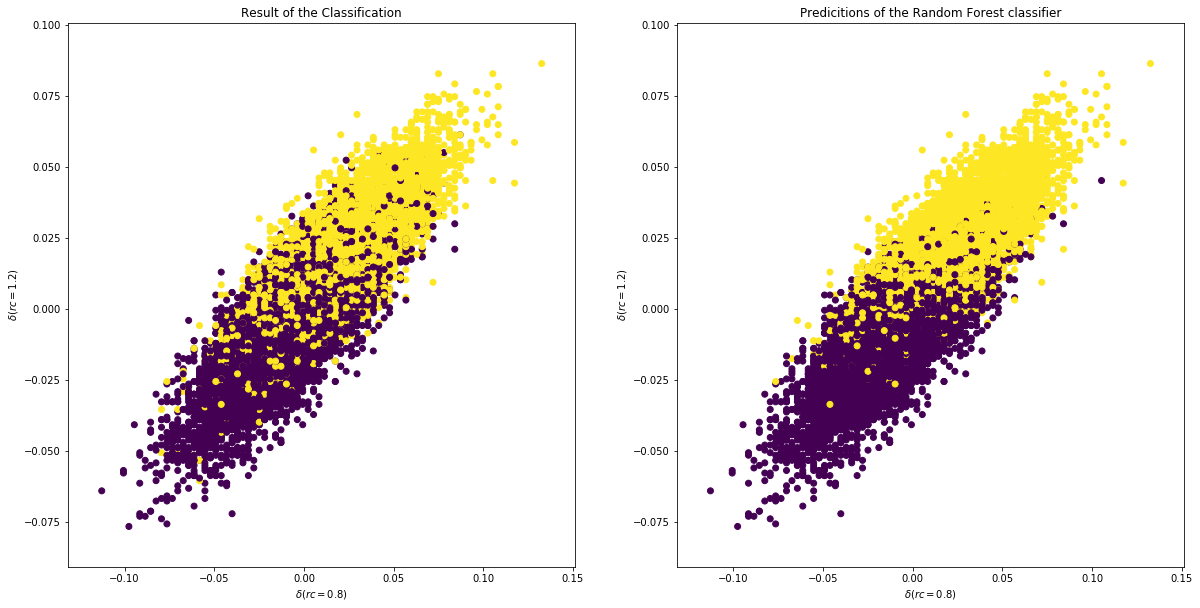

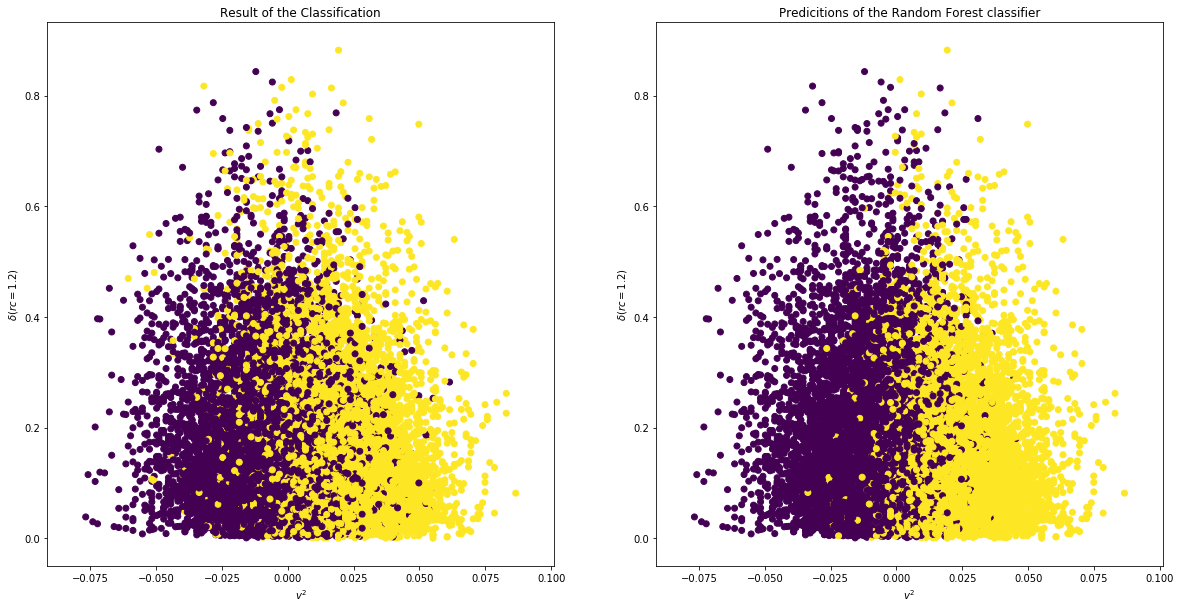

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

#ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(*X_test[:,:2].T, c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Random Forest classifier')
plt.scatter(*X_test[:,:2].T, c = Y_predict_rf)
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$v^2$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

#ax.contourf(x1_list, x2_list, Y_grid, alpha=.4, cmap=plt.cm.coolwarm)
ax.scatter(X_test[:,1].T, X_test[:,-1].T , c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$v^2$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Random Forest classifier')
plt.scatter(X_test[:,1].T, X_test[:,-1].T , c = Y_predict_rf)
plt.show()

In [7]:
#Over all classification report
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_rf)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      7856
         1.0       0.77      0.80      0.78      7144

    accuracy                           0.79     15000
   macro avg       0.79      0.79      0.79     15000
weighted avg       0.79      0.79      0.79     15000



## Fine Tuning the model:

We should fine tune our model to get the best estimation for this purpose we need to find our hyperparameters.

Important hyperparameters of random forests includes:

n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

As the number of hyperparamethers are quite high we cannot find the optimal value of them by traditional method of validation curve, so for this case we can use the grid search methods.

First we should make a parameter grid to sample from during fitting:

### - Random Hyperparameter Grid

In [8]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 12)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In each iteration our algorithm of grid_search will randomly choose each combination of hyperparameters and then it will give us the best parameters of fitting.

### - Grid searching

In [9]:
# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
print('start')
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)
print(rf_random.best_params_)

start
Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 46.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 65.5min finished


{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


The best fitting over 200 randomly chosen combinations in a grid of size 10*2*12*3*3*2=4320 is as found above like this:

{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

Now with these optimal values we can use learning curves for estimating the appropriate training size.

### - Learning Curves

In [10]:
#first we should do the classification with the optimal values.

classifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 4, 
                                    max_features = 'sqrt', max_depth = 10, bootstrap = True, random_state=0)


from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,48000,1000)

#computing training score and validation score for each sample size cv times
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

print('Training scores:\n\n', pd.DataFrame( train_scores) )

print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

Training scores:

            0         1         2         3         4
0   0.905000  0.932000  0.932000  0.932000  0.932000
1   0.868500  0.937500  0.937500  0.937500  0.937500
2   0.870333  0.933000  0.933000  0.933000  0.933000
3   0.866750  0.923500  0.923500  0.923500  0.923500
4   0.868600  0.906200  0.906200  0.906200  0.906200
5   0.871667  0.898000  0.898000  0.898000  0.898000
6   0.863000  0.890571  0.890571  0.890571  0.890571
7   0.859625  0.885625  0.885625  0.885625  0.885625
8   0.858444  0.884000  0.884000  0.884000  0.884000
9   0.851400  0.881500  0.881500  0.881500  0.881500
10  0.848636  0.874364  0.874364  0.874364  0.874364
11  0.845667  0.873833  0.869417  0.869417  0.869417
12  0.845692  0.871000  0.860769  0.860769  0.860769
13  0.843429  0.866857  0.856429  0.856429  0.856429
14  0.841067  0.862000  0.852867  0.852867  0.852867
15  0.838500  0.858375  0.852062  0.852062  0.852062
16  0.836647  0.857176  0.851706  0.851706  0.851706
17  0.832556  0.852222  0.8

[0.9266     0.9237     0.92046667 0.91215    0.89868    0.89273333
 0.88505714 0.880425   0.87888889 0.87548    0.86921818 0.86555
 0.8598     0.85591429 0.85233333 0.8506125  0.84978824 0.84788889
 0.84541053 0.84336    0.84308571 0.83962727 0.83950435 0.838375
 0.837064   0.83657692 0.83623704 0.83614286 0.83587586 0.8341
 0.83533548 0.8335375  0.83286061 0.83330588 0.83316    0.83229444
 0.83158378 0.83084211 0.83167692 0.83255    0.83325366 0.83307619
 0.83233023 0.83292273 0.83139556 0.8313087  0.8316766 ]
[0.77318443 0.78060056 0.78596716 0.79221719 0.79363384 0.79330051
 0.79338385 0.79503374 0.79465037 0.79520043 0.79538379 0.79665054
 0.79655055 0.79615051 0.79591719 0.79616713 0.79668386 0.7975505
 0.79750048 0.79691718 0.79635052 0.7964505  0.79628381 0.79598384
 0.79653387 0.79518386 0.79498389 0.79515055 0.79560053 0.79610052
 0.79635051 0.79638385 0.79650051 0.7962338  0.79548381 0.79578383
 0.79628386 0.7966672  0.79630053 0.79613384 0.79680051 0.79721717
 0.79738383 0.7

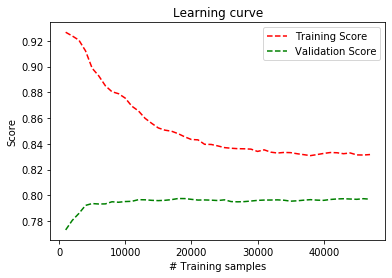

In [11]:
train_scores_mean = train_scores.mean(axis = 1)
print(train_scores_mean)
validation_scores_mean = validation_scores.mean(axis = 1)
print(validation_scores_mean)

plt.title('Learning curve')
plt.plot(ns_list, train_scores_mean,'r--',label = 'Training Score')
plt.plot(ns_list, validation_scores_mean, 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

This learning curve shows us that the good sample size which reduce the overfitting and has a high score is around #training sample = 35000.
but again like previous models we see a bit of bias in the results as can be figured out from the difference between validation score and training score.

Now we should do the train with this number of samples:

In [12]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y , train_size = 35000 , random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)
X = np.array(X)
Y = np.array(Y)

35000
25000
60000


In [13]:
classifier = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, min_samples_leaf = 4, 
                                    max_features = 'sqrt', max_depth = 10, bootstrap = True, random_state=0)

%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_rf = classifier.predict(X_test)
%t Y_predict_rf = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_rf[Y_predict_rf == 1]))

46.9 s ± 856 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.05 s ± 159 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
25000
12239


Looking at the validation of our tunned model shows us that we had about 1% increase in the accuracy from before. 

In [15]:
#Evaluating the new trained model:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_rf)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81     13128
         1.0       0.78      0.81      0.80     11872

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



## Feature Importance:

Random forests give us a great tool to estimate the importance of the each feature that we ae using in the classification problem and this task will give us quite great physical explanation of the most important features in our problem.

Here we computed the feature importances in this problem:

In [24]:
importance = classifier.feature_importances_
print(importance)

[0.01640135 0.05388469 0.12531302 0.18975929 0.19223108 0.13579046
 0.08788107 0.06731743 0.03246507 0.02571287 0.02186688 0.05137679]


As we can see the velocity which is our last feature has small contribution in forming the classification.

A histogram of the importance of densities in different cut-offs is also showed below:

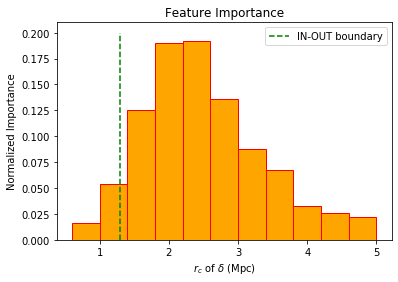

In [42]:
delta = np.array([0.8 , 1.2 , 1.6 , 2 , 2.4 , 2.8 , 3.2 , 3.6 , 4 , 4.4 , 4.8])
importance = np.array([0.01640135, 0.05388469, 0.12531302, 0.18975929, 0.19223108, 0.13579046,
 0.08788107, 0.06731743, 0.03246507, 0.02571287, 0.02186688])

plt.title('Feature Importance')
plt.bar(delta , importance, width = 0.4 , color = 'orange',edgecolor = 'red', capsize =0, linewidth = 1)
plt.vlines(1.3, 0 , 0.2 , color = 'green', linestyles = 'dashed' , label = "IN-OUT boundary")
plt.xlabel('$r_c$ of $\delta$ (Mpc)')
plt.ylabel('Normalized Importance')
plt.legend(loc = 'upper right')
plt.show()

## Metrics:

### - Confusion matrix


In [16]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict_rf)
print('Here is the confusion matrix for the LG classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')


Here is the confusion matrix for the LG classifier: 

TP = 10483   FP = 2645 

FN = 2278   TN = 9594 



Confusion matrix, without normalization
[[10483  2645]
 [ 2278  9594]]
Normalized confusion matrix
[[0.79852224 0.20147776]
 [0.19188005 0.80811995]]


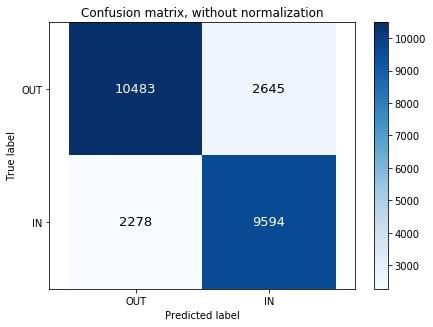

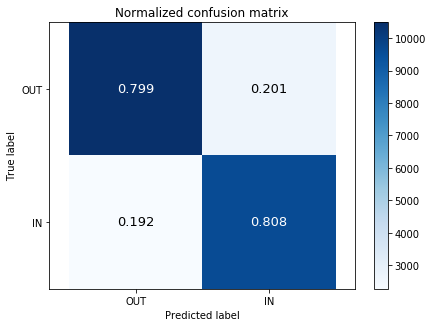

In [17]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

We can read the Acurracy from confusion matrix as well, with following formulation:

### - Acurracy  
$Acurracy = \frac{TP + TN}{TP+TN+FP+FN} * 100$ 

Which means the accuracy is the number of correct prediction on the total training size.

In [18]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 80.308%



### - Precision
The fraction of prediction that we got right = $\frac{TP}{TP+FP}$

### - Recall 
The fraction of the instances that were predicted correctly = $\frac{TP}{TP+FN}$


In [19]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y_test, Y_predict_rf, pos_label=0)
precision = precision_score(Y_test, Y_predict_rf, pos_label = 0)
print(f"The recall for the LG classifier: \n {round(recall,3)}"  )
print(f"The precision for LG classifier: \n {round(precision,3)}"  )

The recall for the LG classifier: 
 0.799
The precision for LG classifier: 
 0.821


### - F1 score

For looking at the precision and recall at the same time we can use the F$\beta$ score of the model which is defined as:

$F\beta_{score} = \frac{(1+\beta^2).precision.recall}{\beta^2 precision+recall}$

we use F1 score for our purpose:

In [20]:
F1 = 2*precision*recall / (precision+recall)
print('The F1 score is : {}'.format(round(F1,3)))

The F1 score is : 0.81


### - Precision - Recall curve

[[0.72705991 0.27294009]
 [0.58469293 0.41530707]
 [0.9076206  0.0923794 ]
 ...
 [0.89926653 0.10073347]
 [0.60710253 0.39289747]
 [0.58998135 0.41001865]]
[0. 0. 0. ... 0. 0. 0.]


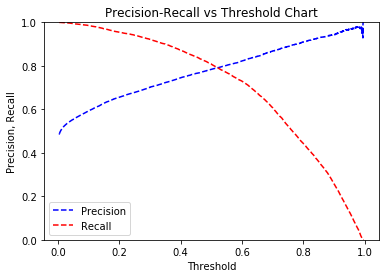

In [21]:
#getting the probability of being in each class from classifier without applying the threshold
Y_probs=classifier.predict_proba(X_test) 
print(Y_probs)
print(Y_predict_rf)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

As can be seen increasing precision will result in decrease of the recall and vice versa.
the trade of point between precision and recall is where the two curves coincides which is around the threshold = 0.5 and will result in precision and recalls equal to 0.8.
so the used 0.5 threshold resulted in the best possible performance of the Logisitc Regression model. and there is no need to change it.

### - ROC curve (Receiver operating characteristic)



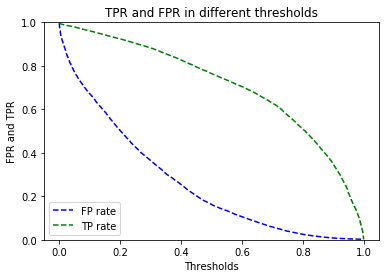

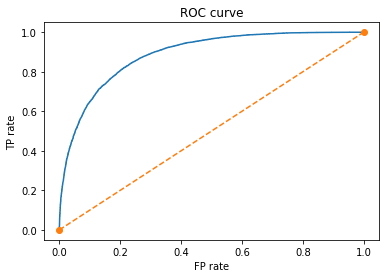

In [22]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_probs[:,1], pos_label=1)

plt.plot(fpr, thresholds , 'b--', label = 'FP rate')
plt.plot(tpr, thresholds , 'g--', label = 'TP rate')
plt.ylabel('FPR and TPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR in different thresholds')
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()


plt.title('ROC curve')
plt.plot(fpr , tpr)
plt.plot([0, 1], [0, 1] , 'o--')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.show()

The threshold that we choose will result to FPR  arond 0.2 and TPR around 0.8 which again seems to be in the best point possible. lower FPRs will result in lower TPRs as well which we do not like!

### - AUC (Area under ROC curve)
also AUC which is the area under the ROC curve can be another measure which will help and it gives an overal measure of the performance of our model over all thresholds. The ideal AUC should be very close to one, but as wee can see the behaviour of our TPR and FPR is in a way that we cannot get this ideal value and the model has divergence from idealized one.
but we cannot tune our model with the help of AUC.

the value of AUC score for our model is:

In [23]:
from sklearn.metrics import roc_auc_score
print('The AUC score of our LG  is : {}' .format(round(roc_auc_score(Y_test, Y_probs[:,1]),3)))

The AUC score of our LG  is : 0.887


## Over all report:

| *Model* || *Training time* || *prediction time* || *f1 score* || *ROC AUC* || *Accuracy* |
|------||------||------||------||------||------|
| *Random Forest*  || 46.9 $s$ || 3.07 $s$ || 0.81 || 0.887 || 80.308% |

# 5 - SVC

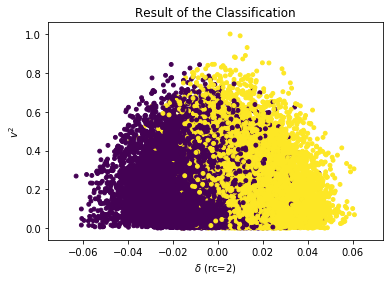

In [2]:
plt.scatter(df['den_rc=2'],df['v^2'],c=df['In_halo'],s=15)
plt.xlabel('$ \delta $ (rc=2)')
plt.ylabel('$v^2$')
plt.title('Result of the Classification')
plt.show()

In [9]:
from sklearn.svm import  SVC
from sklearn import metrics

#SVC(kernel='linear').fit(X,Y)
#SVC(kernel='poly', degree=3).fit(X,Y)
#SVC(kernel='rbf').fit(X,Y)

clf = SVC()

%t clf.fit(x_train,y_train)

y_pred_dt = clf.predict(x_test)
%t y_pred_dt = clf.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_dt))

/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/skle

31.6 s ± 1.33 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.26 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.7935555555555556


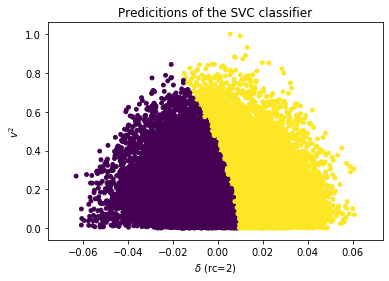

In [15]:
#clf = DecisionTreeClassifier(max_depth=20)
#clf = clf.fit(x_train,y_train)
plt.scatter(x['den_rc=2'],x['v^2'],c=clf.predict(x),s=15)
plt.xlabel('$ \delta $ (rc=2)')
plt.ylabel('$v^2$')
plt.title('Predicitions of the SVC classifier')
plt.show()

##  Validation curve

We have used the RBF kernel for training because other kernels as
linear, are a special case of RBF.There are two hyper parameters C and gamma for this kernel. 

### C (regularization parameter)

/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/skle

/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/skle

/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/skle

/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erfan/anaconda3/lib/python3.7/site-packages/skle

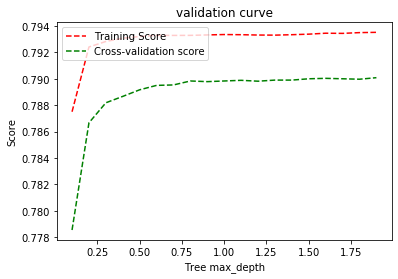

In [12]:
from sklearn.model_selection import validation_curve


param_range = np.arange(.1, 2, .1)

train_scores, test_scores = validation_curve(
    clf, X=x, y=y,cv=5, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()


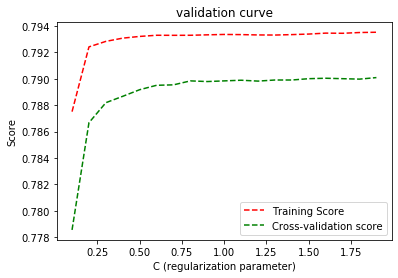

In [14]:
plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('C (regularization parameter)')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()


As training score is a score related to the training set and cross-validation score is relatedd to the test set, if we get high trainig score and low test score it means that our model has pure prediciton and so it's subject to overfitting.So we want our complexity in a way that we get the maximum of cross validation score 
this will be around $C = 1$.

### Gamma

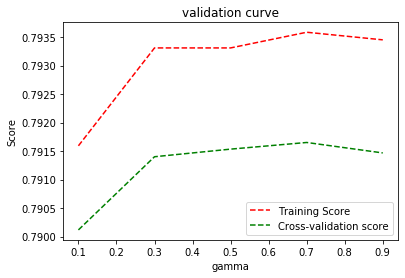

In [5]:
from sklearn.model_selection import validation_curve
from sklearn.svm import  SVC

clf = SVC()
param_range = np.arange(.1, 1.1, .2)

train_scores, test_scores = validation_curve(
    clf, X=x, y=y,cv=3, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.legend(loc='lower right')

plt.show()


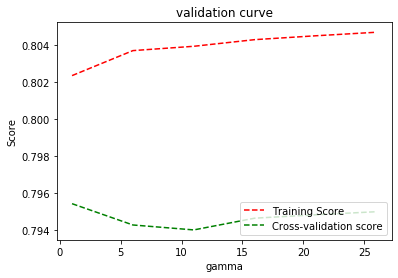

In [10]:
from sklearn.model_selection import validation_curve
from sklearn.svm import  SVC

clf = SVC()
param_range = np.arange(1, 31, 5)

train_scores, test_scores = validation_curve(
    clf, X=x, y=y,cv=3, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.legend(loc='lower right')

plt.show()


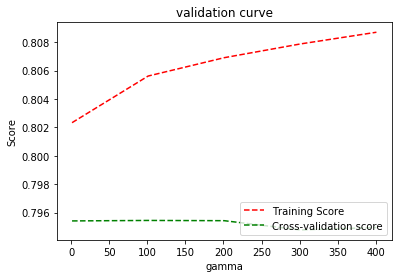

In [11]:
from sklearn.model_selection import validation_curve
from sklearn.svm import  SVC

clf = SVC()
param_range = np.arange(1, 501, 100)

train_scores, test_scores = validation_curve(
    clf, X=x, y=y,cv=3, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.legend(loc='lower right')

plt.show()


In [1]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

x = df.iloc[:,2:]
y = df['In_halo']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20000, random_state=1)

clf = SVC(gamma=0.5)

clf.fit(x_train,y_train)

#y_pred_dt = clf.predict(x_test)
y_pred_svc = clf.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_dt))

NameError: name 'df' is not defined

accuracy scaore = 0.82

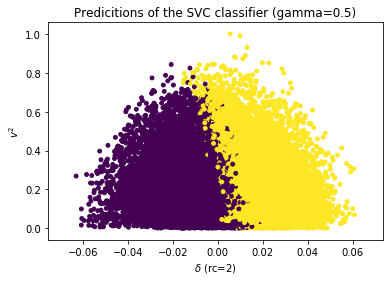

In [14]:
plt.scatter(x['den_rc=2'],x['v^2'],c=clf.predict(x),s=15)
plt.xlabel('$ \delta $ (rc=2)')
plt.ylabel('$v^2$')
plt.title('Predicitions of the SVC classifier (gamma=0.5)')
plt.show()

We get sharper border between two classes with increasing gamma factor. As shown validation score is almost unchanged with respect to gamma but training score is more for larger gamma values which can be considered as an overfitting. So we have set gamma=0.5 in svc. 

##  Learning curve

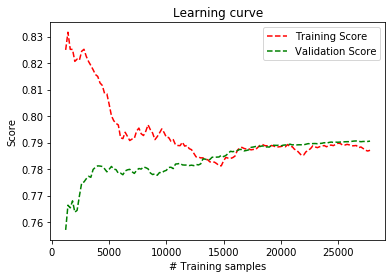

In [18]:
from sklearn.model_selection import learning_curve

clf = SVC()
#clf.fit(x_train,y_train)

train_sizes = np.arange(1000,28000,200)

#computing training score and validation score for each sample size cv times
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= clf , X = x,
                                                   y = y, train_sizes = train_sizes, cv = 3, random_state = 0)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.title('Learning curve')
plt.plot(ns_list[1:], train_scores_mean[1:],'r--',label = 'Training Score')
plt.plot(ns_list[1:], validation_scores_mean[1:], 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

We can see around training sample=20000 training score and validation score start to converge in a high score=0.79 so this sample size is enough for us. You can see that training score and validation score are quite close to each other and also the convergence score is not low so we have low bias and low variance at the same time with training sample size around 20000. 


## Tuning model with new values

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import  SVC
from sklearn import metrics

x = df.iloc[:,2:]
y = df['In_halo']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20000, random_state=1)

clf = SVC(C=1 , gamma=0.5 , probability=True)

%t clf.fit(x_train,y_train)

y_pred_svc = clf.predict(x_test)
%t y_pred_svc = clf.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_svc))

5min 8s ± 13.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.35 s ± 45.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.8027


***Training time of SVC = $5 min $***

***Prediction time of SVC = $ 9.35 s $***

##  Confusion matrix

In [4]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, y_pred_svc)
print(clf_report)

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81     10357
         1.0       0.79      0.81      0.80      9643

    accuracy                           0.80     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000



In [5]:
from sklearn.metrics import confusion_matrix
y_pred_x=clf.predict(x)
print(confusion_matrix(y, y_pred_x))

[[25169  6270]
 [ 5652 22909]]


Confusion matrix, without normalization
[[25169  6270]
 [ 5652 22909]]
Normalized confusion matrix
[[0.80056618 0.19943382]
 [0.19789223 0.80210777]]


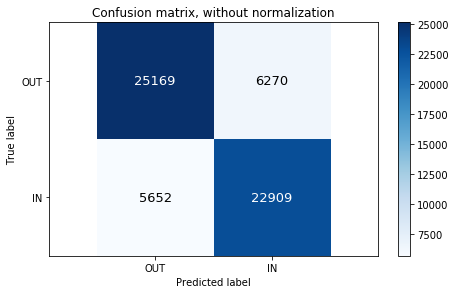

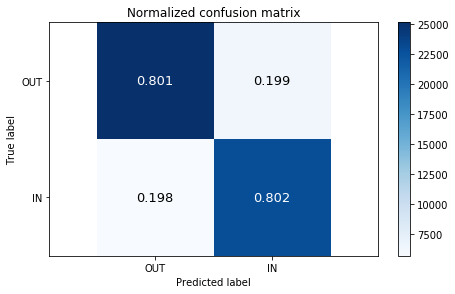

In [6]:
import itertools

conf=confusion_matrix(y, y_pred_x)
class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [7]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y, y_pred_x, pos_label=0))
print(precision_score(y, y_pred_x, pos_label = 0))

0.8005661757689494
0.816618539307615


recall score = 0.80

precision score = 0.82


##  Precision-Recall curve

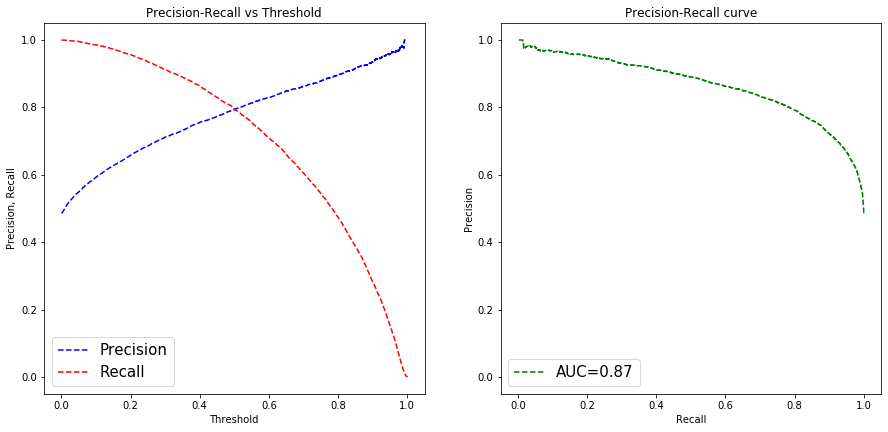

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#clf= SVC(gamma='scale' , probability=True)
#clf.fit(x_train,y_train)
y_probs=clf.predict_proba(x_test) 
precision, recall, thresholds = precision_recall_curve(y_test , y_probs[:, 1]) 
thresholds=np.append(0,thresholds)

area = auc(recall, precision)
#print(area)

plt.figure(figsize=(15, 15))
ax1 = plt.subplot(221,xlabel='Threshold',ylabel='Precision, Recall' ,title='Precision-Recall vs Threshold')
ax1.plot(thresholds, precision, "b--", label="Precision")
ax1.plot(thresholds, recall, "r--", label="Recall")
plt.legend(loc="lower left",prop={'size': 15})

ax2 = plt.subplot(222,title='Precision-Recall curve',xlabel='Recall',ylabel='Precision')
ax2.plot( recall,precision,'g--',label='AUC={:.2f}'.format(area))
ax2.set( ylim=(-.05, 1.05))
plt.legend(loc="lower left",prop={'size': 15})

plt.show()



As can be seen increasing precision will result in decrease of the recall and vice versa.
the trade of point between precision and recall is where to two curves coincide which is around the threshold = 0.5 and will result in precision and recalls equal to 0.8.
so the used 0.5 threshold resulted in the best possible performance of the Logisitc Regression model.

In [10]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_svc)
print(average_precision)

0.7298251033036172


average precision score = 0.73

##  ROC curve

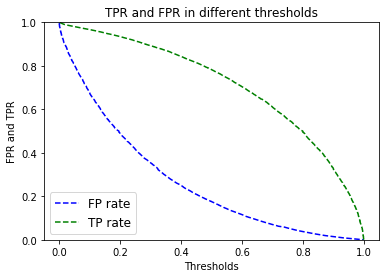

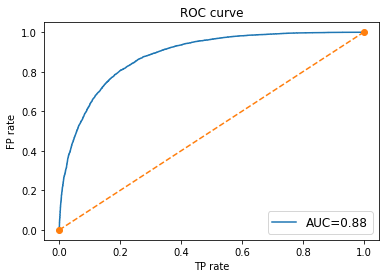

In [9]:
from sklearn import metrics

#y_probs=clf.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs[:,1], pos_label=1)

plt.plot(fpr, thresholds , 'b--', label = 'FP rate')
plt.plot(tpr, thresholds , 'g--', label = 'TP rate')
plt.ylabel('FPR and TPR')
plt.xlabel('Thresholds')
plt.title('TPR and FPR in different thresholds')
plt.legend(loc="lower left",prop={'size': 12})
plt.ylim([0,1])
plt.show()

area = auc(fpr , tpr)
plt.title('ROC curve')
plt.plot(fpr , tpr,label='AUC={:.2f}'.format(area))
plt.plot([0, 1], [0, 1] , 'o--')
plt.ylabel('FP rate')
plt.xlabel('TP rate')
plt.legend(loc="lower right",prop={'size': 12})
plt.show()

# Overall report

| **Model** || **Training time** || **prediction time** || **f1 score** || **ROC AUC** || **Accuracy** |
|------||------||------||------||------||------|
| *Logistic Regression*  || 102 $ms$ || 396 $\mu s$ || 0.809 || 0.882 || 80.004% |
|------||------||------||------||------||------|
| *Knn*  || 17.7 $ms$ || 2.12 $s$ || 0.804 || 0.876 || 79.231% |
|------||------||------||------||------||------|
|   *Decision Tree*   || *180 ms* || *2 ms* || *0.8* || *0.88* || *80%* |
|------||------||------||------||------||------|
| *Random Forest*  || 46.9 $s$ || 3.07 $s$ || 0.81 || 0.887 || 80.308% |
|------||------||------||------||------||------|
|   *SVC*   || *5min* || *10s* || *0.81* || *0.88* || *81%* |
|------||------||------||------||------||------|


All accuracy values are approximately equal, but the most is for is for SVC and Random Forest. ROC AUC and f1 score has its most value in Random Forest model, so it loks like it is the best model to use according to these values. Prediction time is not too long, but it's not the shortest. 